# Reproducible research in dry lab

## What is reproducibility in dry lab? (3-5 min?)

- Make your analysis understandable to fellow researchers and your future self
- Be able to share your research at all times
- Have others reproduce your results with your code easily
- Have your code work reliably with different inputs and in different environments


## Jupyter notebooks (10-16 min)
Currently you are seeing a jupyter notebook. Both Max and Paul use Jupter-Lab daily for our work. We think its great and want to introduce you to it.

In Notebooks you can have analysis and short scripts side by side with text and explanations. Its great to explain what you are doing so others can understand it. It is also self contained, meaning everything you need to produce the results is in this single document, so anyone with the notbook and your data, can understand your entire analysis.

Notebook are organized in blocks. So this is a text or markdown block and 

In [13]:
# This is a code block
# Here you can do python computations
print("Hello World")

Hello World


Once executed, the result of the code block is shown, this even works for plots:

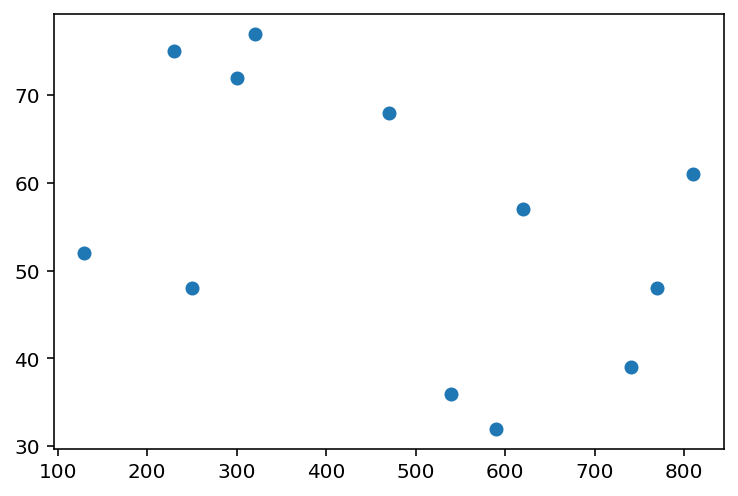

In [14]:
# import matplotlib as the plotting library
import matplotlib.pyplot as plt

# define some sample data
X = [590,540,740,130,810,300,320,230,470,620,770,250]
Y = [32,36,39,52,61,72,77,75,68,57,48,48]

# make the plot
plt.scatter(X,Y)
# and show it to the world
plt.show()

When you save your notebook the output of your code is saved as well. If you load the executed notebok up to github it will be nicely formated: [github.](https://github.com/mffrank/BTM_reproducible_research)

### JupyterLab with R and/or Rmarkdown in Rstudio
Jupyter-lab was developed with python in mind but now supports also other languages, such as R and Julia.
Rstudio is great for those who will only work in R. It has the advantage of workspace displays etc.
If you don't know either tool yet we would recommend learning to use jupyter since it is much more flexible.

## Writing good code
Programming is easy. Writing good code is not.

What makes good code good? That's not easy to say, but sometimes you can see it. You might remember you're first attempts at coding and you might have seen the code of a large project on github. What is different?

Good code has a consistent style across the entire code base. Variables will be named in a similiar way and have meaningful names. 

Good code looks clean, no weird spacing and you might want to follow a style guide. For R we can recommend the Google R style guide (https://google.github.io/styleguide/Rguide.html) and for python you will want to follow PEP8 (https://www.python.org/dev/peps/pep-0008/). It is useful to activate a PEP8 plugin in your code editor of choice.

#### Four examples:
- Variable names
- Functions
- Magic numbers and parameters
- Code commenting

In [46]:
# vairbales should not be random
# You should not write it like this:
x = "Peter Pan"
g, h = x.split()
print(g + " " + h + " is my hero.")


# Variables and functions should be descriptive instead
# and multi-world variables seperated by underscore
name = "Peter Pan"
firstname, lastname = name.split()
print(f"{firstname} {lastname} is my hero.")

# Although both produce the same result.

Peter Pan is my hero.
Peter Pan is my hero.


In [23]:
## We have two datasets and want to find out the difference of their geometric mean
import numpy as np

# Define input
dataset_1 = np.array([10, 7, 18, 3, 9])
dataset_2 = np.array([12, 1, 2, 5, 1])

mean_1 = dataset_1.prod()**(1/len(dataset_1))
mean_2 = dataset_2.prod()**(1/len(dataset_2))

print(mean_1 - mean_2)

5.455048284659643


In [47]:
## Now with functions
import numpy as np

def geom_mean(a):
    """Compute the geometric mean of an array"""
    return a.prod()**(1/len(a))

# Define input
dataset_1 = np.array([10, 7, 18, 3, 9])
dataset_2 = np.array([12, 1, 2, 5, 1])

print(geom_mean(dataset_1) - geom_mean(dataset_2))

5.455048284659643


In [0]:
# magic numbers should not appear in your code, declare them as variables
# and then use the variable instead.
# And always describe where the number comes from.

def geom_mean(a):
    """Compute the geometric mean of an array"""
    return a.prod()**(1/len(a))

def shift_center(c, by = 42):
    """Shifting the center by 42 (default from paper et al 2019)"""
    return(c + by)

coordinates = np.array([12, 1, 2, 5, 1])
center = geom_mean(protein_coordinates)
shifted_center = shift_center(center)
print(f"We shifted the center from {protein_center} to {shifted_center}")

We shifted the center from 2.605171084697352 to 44.60517108469735


### Code comments (10 min)


All code should have a few comments around them. Try to follow these points and you will be fine:

- More comments are better
- Explain *why* not *what* (At least not for trivial functionality)
- Help the reader (future you) understand whats happening
- Document all function parameters and outputs (There are standard ways of doing this in R and python)


In [3]:
%%R
' Add together two numbers.
#' 
#' @param x A number.
#' @param y A number.
#' @return The sum of \code{x} and \code{y}.
#' @examples
#' add(1, 1)
#' add(10, 1)
add <- function(x, y) {
  x + y
}

UsageError: Cell magic `%%R` not found.


In [5]:
# Python 
def add(a, b):
    """Add together two numbers.

   arguments:
    a -- A number
    b -- A number
    """
    return a + b

The advantage of documenting functions like this is that you can automatically compile documentations. Even if you don't want to do that it is good practice to document in a standard way.

## Version control (20 min)

Versioning means whenever you make significant changes in your code, they are tracked and could potentially be changed back again, if they turn out to be not needed. You know this from the `undo` function from most text editors and such. But version control can do more than just that.

### Lets introduce git:

Git was designed to allow version tracking of code and the collaboration of many people on the same project. For this to work we need to help git out.

In [0]:
%%bash
# lets create a folder for a new project
mkdir myproject
cd myproject
# once in it we initialize a new git repository
git init

We can now work in this directory as we please but:

In [0]:
%%bash
echo "I did some work" >> "myproject/Work.txt"

After doing some work we can see what happened using `git status`:

In [19]:
%%bash
cd myproject
# Git status gives you the most relevant info about your repository
git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Work.txt

nothing added to commit but untracked files present (use "git add" to track)


We can now work in this directory as we please but once we did some work we want to commit it, so we can keep track of the changes

In [7]:
%%bash
cd myproject
# Commiting work is a two stage process: First we need to add all files we want to commit.
# In this case it's just Work.txt
git add Work.txt
git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   Work.txt



In [0]:
%%bash
cd myproject
# Now we commit our work with a message that describes what we did
git commit -m "Add work.txt"

Commits represent a unit of work you did. Every problem you solve gets a commit.

Some committing etiquette:
- In general a commit should be described in 80 characters (you can also add a longer description on a new line)
- Use present tense
- Don't commit many things at once (If the description has an "and" split it up)


### Become a git power user
- Learn what you’ll actually use:  
https://rogerdudler.github.io/git-guide/
- Understand the basics:  
https://marklodato.github.io/visual-git-guide/index-en.html
- Understand the principle:  
https://www.sbf5.com/~cduan/technical/git/git-1.shtml
- Learn more in depth: Listen to talks:  
https://www.youtube.com/watch?v=duqBHik7nRo


## Sharing your work with others and collaborating

### Platforms to share code
- [Github](https://github.com/)
- [Gitlab](https://git.embl.de/) (EMBL has it's own server)
- [Bitbucket](https://bitbucket.org/)

Create a github profile, even if you will likely not contribute any code. These platforms are important also for discussions and error reports.  
Terms you should know:
- README at the root of the project
- Issues
- Branches
- Pull requests


## Project setup

I organize my projects as a git repository with a defined folder structure. This makes it easy for myself to find things later but also means I can automate a lot of boring tasks:

- myproject/
  - .gitignore
  - README.md
  - data/
  - results/
  - doc/
  - src/

An example how to quickly generate project structures like this one can be found here: https://github.com/chendaniely/computational-project-cookie-cutter/.
A .gitignore file tells git what to not include in its version tracking. This will usually be large data files, personal configuration files etc.

## Software environments
Let's say you documented your code well and tracked it with a version control system. Great! But have you ever tried to install an R/python package from a paper or tried to run a labmates script and had to install dependencies for half an hour first? How can you make sure that your package or script runs on another persons computer?







### Conda (15 min)

Conda is a dependency manager developed for python. It also works for R packages now. For those familiar with pip, it just is a superior alternative to pip.

#### What does conda do?
- Conda lets you create environments (=blank slates that software can be installed into)
- Conda installs software (and makes sure all your installed software will work together)
- Conda produces a recipe to install everything in your environment on another computer
#### Install conda
- [Anaconda](https://www.anaconda.com/distribution/): Graphical user interface (for people that are not too comfortable in the command line)
- [miniconda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/): Minimal version, usually sufficient

In [0]:
%%bash
conda create --name myproject python=3.7
conda activate myproject
conda install numpy

# or in a single line (using the default python)
conda create -n myproject numpy

## Advanced Topics

Going into depth for these topics would not make sense in this session, but we feel it's important to be aware of their existence.

### Docker / Singularity (2 min)
Conda works fine for python and R projects. But sometimes you have more than just python or R in your pipeline. Singulairty and Docker install a whole virtual system on another computer that you can install anything you like in.

The beauty of this system is, that you can now share either the recipe for the container or the container itself and the software inside of it just works:

In [0]:
# running a singulairty command
singularity exec container.sif complex_software --input A --output B

### Testing
For bigger software projects it is important to know if any change that i made to the code will break some existing code.
Therefore writing tests is important for production code.

### Pipelines
There are many tools to create pipelines:
- Sakemake
- Nextflow
- CWL

Come to Pauls session if you want to learn about this